In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 데이터 불러오기
df = pd.read_csv("C:\\Users\\axhtl\\OneDrive\\바탕 화면\\학교\\인공지능개론\\diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [2]:
# Outcome 컬럼 삭제
X = df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [4]:
# BMI를 레이블로 설정
y = df['BMI']
y.head()

Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [5]:
Y = y.values # 회귀 문제이므로 get_dummies()를 사용하여 분류처럼 처리하지 않음.

In [6]:
X = X.values

In [7]:
X

array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]])

In [8]:
y

Pregnancies
6     33.6
1     26.6
8     23.3
1     28.1
0     43.1
      ... 
10    32.9
2     36.8
5     26.2
1     30.1
1     30.4
Name: BMI, Length: 768, dtype: float64

In [9]:
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 7), (154, 7), (614, 248), (154, 248))

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(7,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',  # loss를 키워드 인자로 변경
              metrics=['mse'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 10)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │              54 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229 (916.00 B)

 Trainable params: 229 (916.00 B)

 Non-trainable params: 0 (0.00 B)

In [23]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32, validation_split=0.1)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 146ms/step - loss: 101.5512 - mse: 101.5512 - val_loss: 8.6283 - val_mse: 8.6283
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.5669 - mse: 5.5669 - val_loss: 1.9904 - val_mse: 1.9904
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.6837 - mse: 1.6837 - val_loss: 1.1796 - val_mse: 1.1796
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 1.0312 - mse: 1.0312 - val_loss: 0.7608 - val_mse: 0.7608
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.7053 - mse: 0.7053 - val_loss: 0.5541 - val_mse: 0.5541
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.4879 - mse: 0.4879 - val_loss: 0.4266 - val_mse: 0.4266
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.3327 - mse: 0.3327 - val_loss: 0.3337 - val_mse: 0.3337
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2553 - mse: 0.2553 - val_loss: 0.2641 - val_mse: 0.2641
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss:

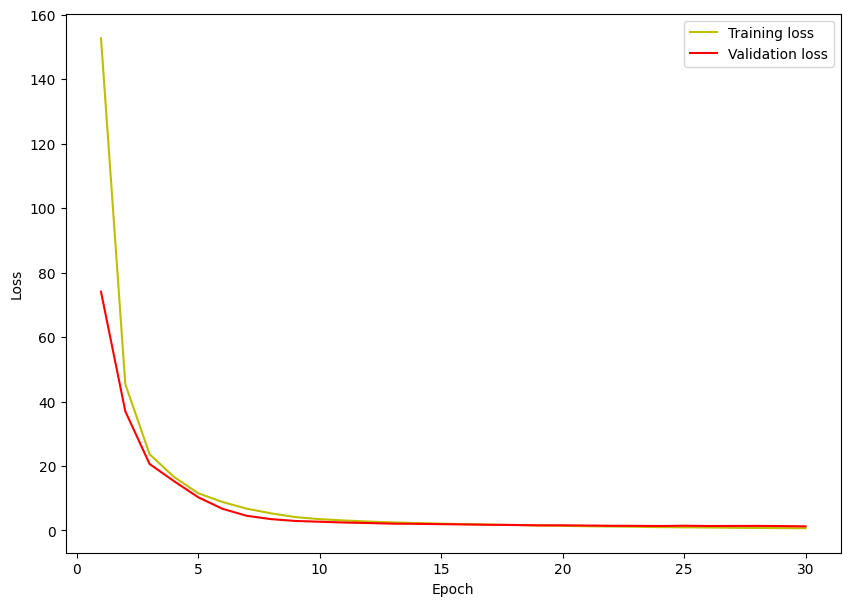

In [25]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0322 - mse: 0.0322


[0.0355023518204689, 0.0355023518204689]